# Diferenciação Automática e micrograd

Agenda técnica semanal

---

-  Desvendando a Diferenciação Automática: Uma Imersão no micrograd de Andrej Karpathy


## 1. Introdução

### O que é diferenciação automática?
- É um conjunto de técnicas que nos permite calcular derivadas de funções de maneira eficiente e exata. 
- É fundamental para o treinamento de redes neurais
    - é o que viabiliza algoritmos como o da descida do gradiente - responsável por ajustar os parâmetros

### Por Que Precisamos de Gradientes?
-   Para otimizar modelos (e.g., redes neurais), precisamos ajustar seus parâmetros.
-   Ajustar parâmetros significa minimizar uma função de custo (loss function).
-   Como encontramos a 'descida' mais íngreme para o mínimo? **Gradientes!**

### 1.1 Recap: O Básico - Regressão Linear Simples.

-   Começamos com algo familiar: uma regressão linear simples.

-   **Modelo:** $\hat{y} = wx + b$
    -   $w$: peso (slope)
    -   $b$: bias (intercept)
    -   $x$: input
    -   $\hat{y}$: previsão
    -   $y$: target
-   **Função de Custo (MSE):** $L = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2$
-   Para otimizar $w$ e $b$, precisamos calcular $\frac{\partial L}{\partial w}$ e $\frac{\partial L}{\partial b}$.


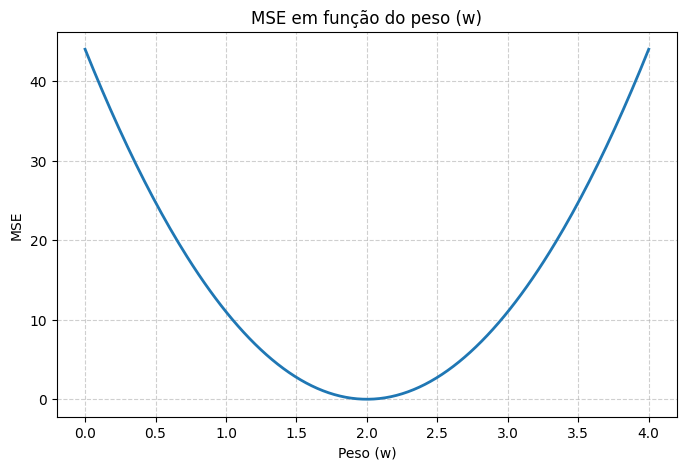

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dados simples
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])  # relação linear perfeita (y = 2x)

# Definir range de pesos
w_values = np.linspace(0,  4, 200)
mse_values = []

# Calcular MSE para cada peso
for w in w_values:
    y_pred = w * X
    mse = np.mean((y - y_pred) ** 2)
    mse_values.append(mse)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(w_values, mse_values, linewidth=2)
plt.xlabel("Peso (w)")
plt.ylabel("MSE")
plt.title("MSE em função do peso (w)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Ideia chave: o gradiente nos diz como ajustar $w$ para chegar ao mínimo da função de custo.
Esse é o coração do método conhecido como **"descida do gradiente"**.

#### 1.1.1 Derivadas no Caso da Regressão Linear

Dado o modelo:

$$
\hat{y} = wx + b
$$

e a função de custo MSE:

$$
L(w, b) = \frac{1}{N} \sum_{i=1}^N (y_i - (wx_i + b))^2
$$

Os gradientes são:

$$
\frac{\partial L}{\partial w} = -\frac{2}{N} \sum_{i=1}^N x_i (y_i - (wx_i + b)), 
\quad
\frac{\partial L}{\partial b} = -\frac{2}{N} \sum_{i=1}^N (y_i - (wx_i + b))
$$


In [2]:
import numpy as np

# Dados simples
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])  # relação linear perfeita (y = 2x)

def gradients(w, b, X, y):
    N = len(X)
    y_pred = w * X + b
    dw = -2 * np.sum(X * (y - y_pred)) / N
    db = -2 * np.sum(y - y_pred) / N
    return dw, db

w, b = 0.0, 0.0
dw, db = gradients(w, b, X, y)
print("dw =", dw, "db =", db)
# eta

dw = -44.0 db = -12.0


#### 1.1.2 Método da Descida do Gradiente

A atualização dos parâmetros segue a regra iterativa:

$$
w \leftarrow w - \eta \frac{\partial L}{\partial w}, 
\quad 
b \leftarrow b - \eta \frac{\partial L}{\partial b}
$$

- $\eta$: taxa de aprendizado (*learning rate*).

- Processo **iterativo**: a cada passo, os parâmetros se movem na direção contrária ao gradiente.  


#### 1.1.3 Visualização da Descida do Gradiente no MSE

In [3]:
import numpy as np

# Dataset simples
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])  # y = 2x

# Função de custo
def mse_full(w, b, X, y):
    return np.mean((y - (w*X + b))**2)

# Gradientes
def gradients(w, b, X, y):
    N = len(X)
    y_pred = w * X + b
    dw = -2 * np.sum(X * (y - y_pred)) / N
    db = -2 * np.sum(y - y_pred) / N
    return dw, db

# Inicialização
w, b = 0.0, 0.0
lr = 0.01
steps = 10

print("Iter |    w     |    b     |   Loss")
print("--------------------------------------")
for step in range(steps):
    dw, db = gradients(w, b, X, y)
    w -= lr * dw
    b -= lr * db
    loss = mse_full(w, b, X, y)
    print(f"{step:4d} | {w:7.3f} | {b:7.3f} | {loss:7.3f}")

Iter |    w     |    b     |   Loss
--------------------------------------
   0 |   0.440 |   0.120 |  25.661
   1 |   0.776 |   0.211 |  14.973
   2 |   1.033 |   0.280 |   8.745
   3 |   1.229 |   0.333 |   5.116
   4 |   1.378 |   0.372 |   3.000
   5 |   1.493 |   0.402 |   1.768
   6 |   1.580 |   0.425 |   1.049
   7 |   1.647 |   0.441 |   0.630
   8 |   1.698 |   0.454 |   0.386
   9 |   1.737 |   0.463 |   0.244


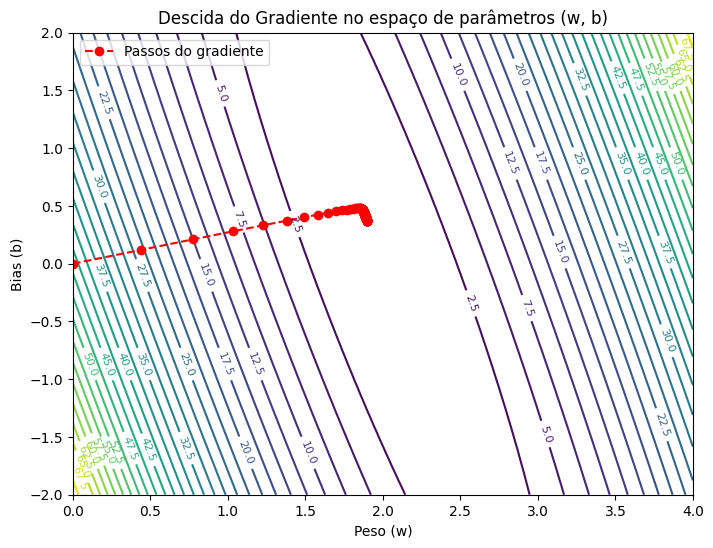

In [4]:
# Guardar histórico dentro do loop
w, b = 0.0, 0.0
lr = 0.01
steps = 100

w_hist, b_hist, loss_hist = [w], [b], [mse_full(w, b, X, y)]

#print("Iter |    w     |    b     |   Loss")
# print("--------------------------------------")
for step in range(steps):
    dw, db = gradients(w, b, X, y)
    w -= lr * dw
    b -= lr * db
    loss = mse_full(w, b, X, y)
    #print(f"{step:4d} | {w:7.3f} | {b:7.3f} | {loss:7.3f}")
    w_hist.append(w)
    b_hist.append(b)
    loss_hist.append(loss)

# Agora plota a função de custo em (w,b)
w_range = np.linspace(0, 4, 100)
b_range = np.linspace(-2, 2, 100)
W, B = np.meshgrid(w_range, b_range)
Z = np.array([[mse_full(w_, b_, X, y) for w_, b_ in zip(row_w, row_b)]
              for row_w, row_b in zip(W, B)])

plt.figure(figsize=(8, 6))
cp = plt.contour(W, B, Z, levels=30, cmap="viridis")
plt.clabel(cp, inline=True, fontsize=8)
plt.plot(w_hist, b_hist, "ro--", label="Passos do gradiente")
plt.xlabel("Peso (w)")
plt.ylabel("Bias (b)")
plt.title("Descida do Gradiente no espaço de parâmetros (w, b)")
plt.legend()
plt.show()


- No caso 1D (só $w$), vimos uma parábola. Quando temos $w$ e $b$, vira uma superfície.
- Esse gráfico mostra o espaço de parâmetros $(w, b)$. 
- Cada linha é como um nível de altura da função de custo.
- Os parâmetros descem seguindo os gradientes até a loss mínima.

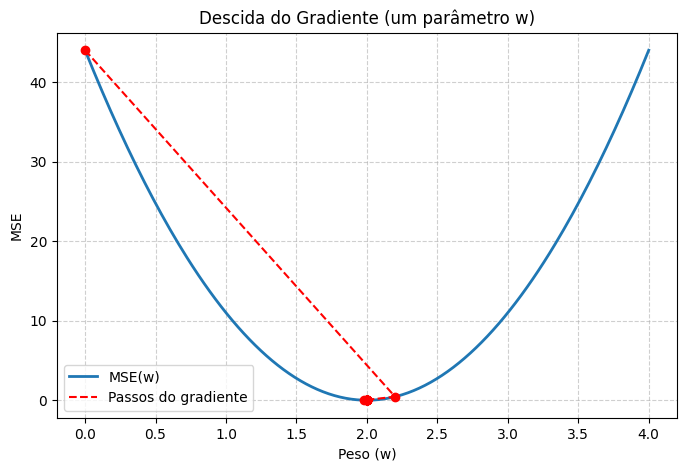

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Dados simples
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])  # y = 2x

# Função de custo considerando só w (b=0)
def mse_w(w):
    y_pred = w * X
    return np.mean((y - y_pred) ** 2)

def mse_grad_w(w):
    y_pred = w * X
    return -2 * np.mean(X * (y - y_pred))

# Preparar curva parabólica
w_values = np.linspace(0, 4, 200)
mse_values = [mse_w(wi) for wi in w_values]

# Simular passos do gradiente (com b fixo em 0)
w = 0.0
lr = 0.05
steps = 20
w_history, loss_history = [w], [mse_w(w)]

for i in range(steps):
    grad = mse_grad_w(w)
    w -= lr * grad
    w_history.append(w)
    loss_history.append(mse_w(w))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(w_values, mse_values, label="MSE(w)", linewidth=2)
plt.scatter(w_history, loss_history, color="red", zorder=5)
plt.plot(w_history, loss_history, "--", color="red", label="Passos do gradiente")
plt.xlabel("Peso (w)")
plt.ylabel("MSE")
plt.title("Descida do Gradiente (um parâmetro w)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### 1.1.4 Ajustando um Dataset Sintético

Agora vamos usar descida do gradiente para **ajustar uma reta** a um conjunto de pontos.

In [6]:
# Criar dataset sintético
np.random.seed(42)
X = np.linspace(0, 10, 50)
y_true = 3 * X + 5
y = y_true + np.random.randn(*X.shape) * 3  # adiciona ruído

# Função de custo completa
def mse_full(w, b, X, y):
    return np.mean((y - (w*X + b)) ** 2)

def gradients(w, b, X, y):
    N = len(X)
    y_pred = w * X + b
    dw = -2 * np.sum(X * (y - y_pred)) / N
    db = -2 * np.sum(y - y_pred) / N
    return dw, db

# Inicialização
w, b = np.random.randn(), np.random.randn()
lr = 0.001
steps = 200

history = []
for step in range(steps):
    dw, db = gradients(w, b, X, y)
    w -= lr * dw
    b -= lr * db
    if step % 20 == 0:
        history.append((w, b))

print(f"Parâmetros finais: w={w:.2f}, b={b:.2f}")

Parâmetros finais: w=3.51, b=0.59


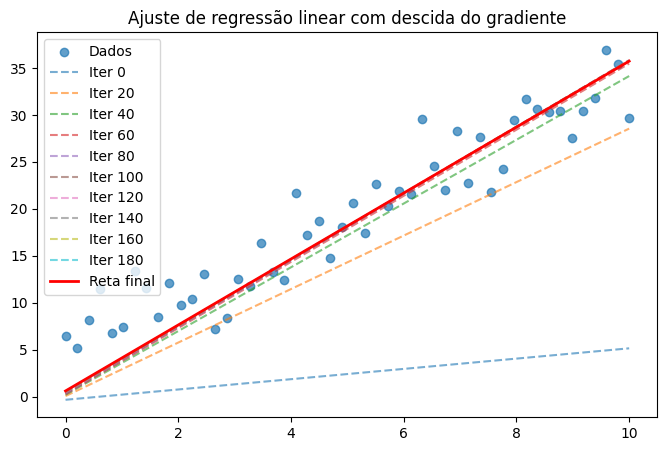

In [7]:
# Plot evolução da reta
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.7, label="Dados")
x_line = np.linspace(0, 10, 100)

for i, (wi, bi) in enumerate(history):
    plt.plot(x_line, wi*x_line + bi, "--", alpha=0.6, label=f"Iter {i*20}")

plt.plot(x_line, w*x_line + b, "r-", linewidth=2, label="Reta final")
plt.legend()
plt.title("Ajuste de regressão linear com descida do gradiente")
plt.show()


### 1.2. O Neurônio Básico: Unidade Fundamental das Redes Neurais

**Neurônio:** Unidade fundamental que recebe entradas (inputs), aplica pesos (weights), soma um viés (bias) e passa por uma função de ativação.

Um neurônio pode ser dividido em duas partes:

#### 1. Transformação Linear
A primeira etapa é uma combinação linear das entradas:

$\mathbf{z} = \mathbf{w}\mathbf{x} + \mathbf{b}$

Onde:
- $\mathbf{x} \in \mathbb{R}^n$ é o vetor de entrada
- $\mathbf{w} \in \mathbb{R}^n$ é o vetor de pesos do neurônio
- $b \in \mathbb{R}$ é o bias (escalar)
- $z \in \mathbb{R}$ é a saída linear do neurônio

In [8]:
# Exemplo visual de um neurônio - parte linear
import numpy as np
import math

# Vamos simular um neurônio simples com 2 entradas
x1, x2 = 1.5, -0.8  # Entradas
w1, w2 = 0.6, 0.3   # Pesos
b = 0.2             # Bias

# Transformação linear
z = w1*x1 + w2*x2 + b

print(f"=== NEURÔNIO BÁSICO ===")
print(f"Entradas: x1={x1}, x2={x2}")
print(f"Pesos: w1={w1}, w2={w2}")
print(f"Bias: b={b}")
print(f"\n1. Transformação Linear:")
print(f"z = w1*x1 + w2*x2 + b")
print(f"z = {w1}*{x1} + {w2}*{x2} + {b} = {z}")

=== NEURÔNIO BÁSICO ===
Entradas: x1=1.5, x2=-0.8
Pesos: w1=0.6, w2=0.3
Bias: b=0.2

1. Transformação Linear:
z = w1*x1 + w2*x2 + b
z = 0.6*1.5 + 0.3*-0.8 + 0.2 = 0.8599999999999999


#### 2. Transformação Não-Linear (Função de Ativação)
A segunda etapa aplica uma função não-linear:

$\mathbf{a} = \sigma(\mathbf{z})$

Onde $\sigma$ é uma função de ativação não-linear (ex: tanh, ReLU, sigmoid, softmax).

In [9]:
# Continuando o exemplo do neurônio - parte não-linear
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leakyrelu(x, alpha=0.3):
    return np.maximum(alpha*x, x)

# Aplicando função de ativação
a_sigmoid = sigmoid(z)
a_tanh = tanh(z)
a_relu = relu(z)
a_leakyrelu = leakyrelu(z)


print(f"\n2. Transformação Não-Linear (Função de Ativação):")
print(f"a = σ(z)\n")
print(f"\n=== RESULTADO FINAL DO NEURÔNIO ===\n")
print(f"Sigmoid: a = 1/(1+e^(-{z:.3f})) = {a_sigmoid:.3f}")
print(f"Tanh:    a = tanh({z:.3f}) = {a_tanh:.3f}")
print(f"ReLU:    a = max(0, {z:.3f}) = {a_relu:.3f}")
print(f"LeakyReLU:    a = max(alpha * x, {z:.3f}) = {a_relu:.3f}")


print(f"Entrada: [{x1}, {x2}] → Saída: {a_tanh:.3f} (usando tanh)")


2. Transformação Não-Linear (Função de Ativação):
a = σ(z)


=== RESULTADO FINAL DO NEURÔNIO ===

Sigmoid: a = 1/(1+e^(-0.860)) = 0.703
Tanh:    a = tanh(0.860) = 0.696
ReLU:    a = max(0, 0.860) = 0.860
LeakyReLU:    a = max(alpha * x, 0.860) = 0.860
Entrada: [1.5, -0.8] → Saída: 0.696 (usando tanh)


Ideia chave: o neurônio é basicamente regressão linear + não linearidade.

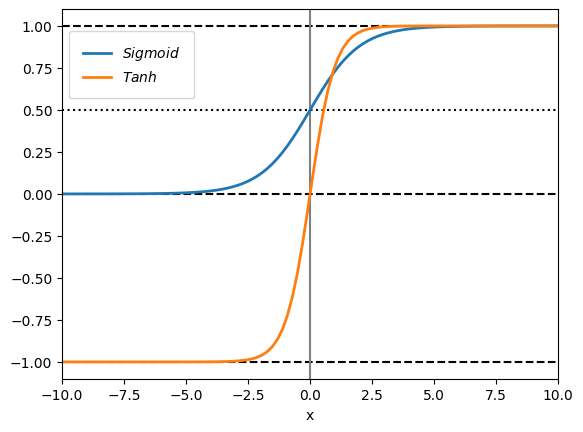

In [10]:
import matplotlib.pyplot as plt

# Plotar as funções
# plt.figure(figsize=(10, 6))

x = np.linspace(-10, 10, 100)
sigmoid_y = sigmoid(x)
tanh_y = tanh(x)

plt.axhline(y=-1, color="black", linestyle="--")
plt.axhline(y=0, color="black", linestyle="--")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.axhline(y=1.0, color="black", linestyle="--")
plt.axvline(color="grey")
#plt.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))
plt.plot(x, sigmoid_y, linewidth=2, label=r"$Sigmoid$")
plt.plot(x, tanh_y, linewidth=2, label=r"$Tanh$")
plt.xlim(-10, 10)
plt.xlabel("x")
plt.legend(fontsize=14)
plt.legend(loc='best', borderpad=1, bbox_to_anchor=(0.5, 0.6, -0.22, 0.5))
plt.show()

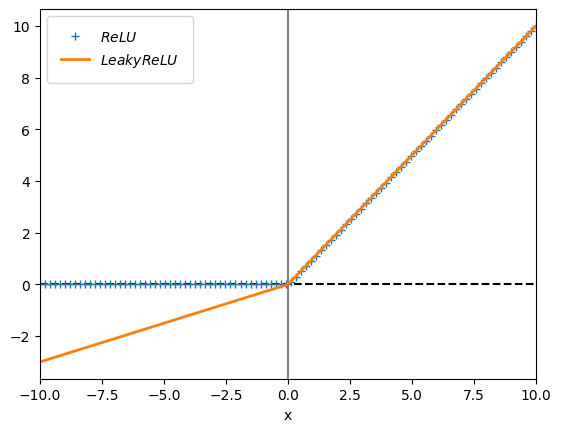

In [11]:
# Relu, leaky relu e Softplus
x = np.linspace(-10, 10, 100)
relu_y = relu(x)
leakyrelu_y = leakyrelu(x, alpha=0.3)
#softplus_y =  np.log(1 + np.exp(x))

plt.axhline(y=0, color="black", linestyle="--")
# plt.axhline(y=0.5, color="black", linestyle=":")
# plt.axhline(y=1.0, color="black", linestyle="--")
plt.axvline(color="grey")
# plt.axvline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))
plt.plot(x, relu_y, '+', linewidth=2, label=r"$ReLU$")
plt.plot(x, leakyrelu_y, linewidth=2, label=r"$LeakyReLU$")
#plt.plot(x, softplus_y, linewidth=2, label=r"$Softplus$")
plt.xlim(-10, 10)
plt.xlabel("x")
#plt.legend(fontsize=14)
plt.legend(loc='best', borderpad=1)
plt.show()

### 1.3. Rede neural - Composição

In [12]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    ax : objeto matplotlib.axes.AxesSubplot
    left, right, bottom, top : limites da figura
    layer_sizes : lista com o número de neurônios em cada camada
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(n_layers - 1)
    # nós
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), 
                                0.05, color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # conexões
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n+1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing],
                                  c='k')
                ax.add_artist(line)

#### 1.3.1 Empilhamento de neurônios

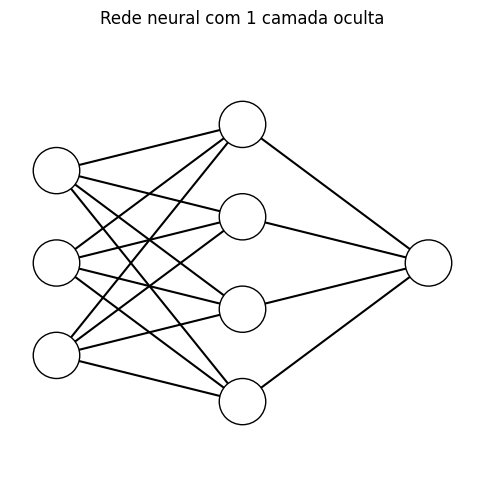

In [13]:
# --- Exemplo 1: rede com 1 camada oculta ---
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [3, 4, 1])  # 3 entradas, 1 camada oculta com 4 neurônios, 2 saídas
plt.title("Rede neural com 1 camada oculta")
plt.show()

#### 1. Transformação Linear (múltiplos neurônios)
A primeira etapa é uma combinação linear das entradas:

$\mathbf{z} = \mathbf{W}\mathbf{x} + \mathbf{b}$

Onde:
- $\mathbf{x} \in \mathbb{R}^n$ é o vetor de entrada
- $\mathbf{W} \in \mathbb{R}^{m \times n}$ é a matriz de pesos
- $\mathbf{b} \in \mathbb{R}^m$ é o vetor de bias
- $\mathbf{z} \in \mathbb{R}^m$ é a saída linear

#### 2. Transformação Não-Linear (Função de Ativação)
A segunda etapa aplica uma função não-linear:

$\mathbf{a} = \sigma(\mathbf{z})$

Onde $\sigma$ é uma função de ativação não-linear (ex: tanh, ReLU, sigmoid, softmax).

#### 1.3.2 Sequencia de camadas

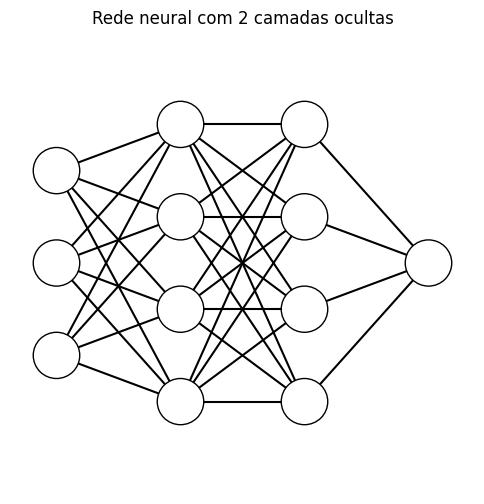

In [14]:
# --- Exemplo 2: rede com 2 camadas ocultas ---
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [3, 4, 4, 1])  # 3 entradas, 2 camadas ocultas, 2 saídas
plt.title("Rede neural com 2 camadas ocultas")
plt.show()

#### 1.3. Composição de Funções em Redes Neurais

Uma rede neural multicamadas é essencialmente uma **composição de funções**:

Para uma rede de 3 camadas:
$$f(\mathbf{x}) = f_3(f_2(f_1(\mathbf{x})))$$

Onde cada $f_i$ representa:
$$f_i(\mathbf{x}) = \sigma_i(\mathbf{W}_i\mathbf{x} + \mathbf{b}_i)$$


Um neurônio → vetor de pesos.

Uma camada inteira → matriz de pesos.

In [15]:
# Exemplo conceitual de composição de funções
def composition_example():
    """
    Uma rede de 2 camadas:
    h1 = tanh(W1*x + b1)  <- f1(x)
    y  = tanh(W2*h1 + b2) <- f2(f1(x))
    
    Isso é equivalente a:
    y = tanh(W2 * tanh(W1*x + b1) + b2)
    
    Uma composição de funções!
    """
    x = [1.0, -0.5]
    
    # Camada 1
    W1 = [[0.2, 0.3], [-0.1, 0.4]]
    b1 = [0.1, -0.2]
    
    # z1 = W1*x + b1
    z1 = [W1[0][0]*x[0] + W1[0][1]*x[1] + b1[0],
          W1[1][0]*x[0] + W1[1][1]*x[1] + b1[1]]
    
    # h1 = tanh(z1)  
    h1 = [math.tanh(z) for z in z1]
    
    print(f"Input: {x}")
    print(f"Hidden layer: {h1}")
    
    # Camada 2
    W2 = [0.6, -0.8]
    b2 = 0.1
    
    z2 = W2[0]*h1[0] + W2[1]*h1[1] + b2
    y = math.tanh(z2)
    
    print(f"Final output: {y}")
    
    return y

composition_example()

Input: [1.0, -0.5]
Hidden layer: [0.148885033623318, -0.46211715726000974]
Final output: 0.5072534760487065


0.5072534760487065

#### 1.4. A Necessidade de Otimização e a Regra da Cadeia

Para treinar nossa rede, precisamos:

1. **Função de Custo**: Mede o erro entre predição e target
   $$L = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$ (MSE)

2. **Otimização**: Minimizar $L$ ajustando os parâmetros $\theta = \{W, b\}$
   $$\theta^{(t+1)} = \theta^{(t)} - \alpha \nabla_\theta L$$

3. **Gradientes**: Precisamos calcular $\frac{\partial L}{\partial w_{ij}}$ para cada peso

**Aqui entra a Regra da Cadeia!**

Para uma função composta $f(g(x))$, a regra da cadeia nos diz:
$$\frac{df}{dx} = \frac{df}{dg} \cdot \frac{dg}{dx}$$

Em redes neurais, isso se torna:
$$\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial h_2} \cdot \frac{\partial h_2}{\partial h_1} \cdot \frac{\partial h_1}{\partial w_1}$$

- As redes podem ser vistas como um grafo computacional - Directed Acyclic Graph (DAG, Grafo Acíclico Dirigido):

![forward_backawar](figures/foward_backwar_prop.png)
- https://medium.com/@davivc/um-mergulho-profundo-na-matem%C3%A1tica-por-tr%C3%A1s-das-redes-neurais-77994b87a2ab

Esse grafo será o elo de ligação para entendermos a diferenciação automática.

#### 1.4. Rede neural - Resumo

-   **Neurônio:** Unidade fundamental que recebe entradas (inputs), aplica pesos (weights), soma um viés (bias) e passa por uma função de ativação.
-   **Forward Pass:** Os inputs fluem através da rede, ativando neurônios camada por camada, até produzir um output final.
-   **Backward Pass:** O erro entre o output da rede e o output desejado é usado para calcular como cada peso e bias contribuíram para esse erro (gradientes).

- Para otimizar a rede, minimizamos a **função de custo (loss function)** aplicada à saída.
- O método mais comumente utilizado é a **descida do gradiente (gradient descent)**.
- Para encontrar o mínimo, precisamos calcular os **gradientes de todos os pesos e bias** em relação à loss.
- Essa tarefa massiva de cálculo de gradientes é feita eficientemente usando a **Regra da Cadeia** em um processo chamado **Backpropagation**.

## 2. Tipos de Diferenciação: Uma Visão Geral

### 2.1. Diferenciação Numérica

-   **Conceito:** Aproximação da derivada usando pequenas variações.
    $f'(x) \approx \frac{f(x+h) - f(x)}{h}$
-   **Vantagens:** Simples de entender e implementar.
-   **Desvantagens:**
    -   **Imprecisão:** Erros de arredondamento e de truncamento (depende do `h`).
    -   **Alto Custo Computacional:** Para uma função com $N$ parâmetros, exige $N+1$ avaliações da função. Inviável para redes neurais grandes.

In [16]:
# Exemplo de Diferenciação Numérica
def f(x):
    return x**2

h = 0.0001
x = 3.0
f_prime_approx = (f(x + h) - f(x)) / h
print(f"Derivada numérica de f(x) = x^2 em x={x}: {f_prime_approx:.4f}")
print(f"Valor real (2x): {2*x}")

Derivada numérica de f(x) = x^2 em x=3.0: 6.0001
Valor real (2x): 6.0


### 2.2. Diferenciação Simbólica

-   **Conceito:** Aplica regras de derivação para obter uma *expressão exata* da derivada.
    -   Ex: $f(x) = x^2 \implies f'(x) = 2x$
    -   Ex: $g(x) = \sin(x^2) \implies g'(x) = 2x\cos(x^2)$ (Regra da Cadeia)
-   **Vantagens:** Precisão exata (quando bem implementada).
-   **Desvantagens:**
    -   **'Expression Explosion':** As expressões podem se tornar extremamente complexas e grandes para funções aninhadas.
    -   Difícil de implementar para funções arbitrárias (requer um sistema algébrico).

In [17]:
# Exemplo Ilustrativo de Diferenciação Simbólica (SymPy)
from sympy import symbols, diff, sin

x = symbols('x')
f_sym = x**2
g_sym = sin(x**2)

print(f"Derivada simbólica de f(x) = x^2: {diff(f_sym, x)}")
print(f"Derivada simbólica de g(x) = sin(x^2): {diff(g_sym, x)}")

Derivada simbólica de f(x) = x^2: 2*x
Derivada simbólica de g(x) = sin(x^2): 2*x*cos(x**2)


### 2.3. Diferenciação Automática (AD - Automatic Differentiation)

-   **Conceito:** Não é simbólica nem numérica.
    - Decompõe a função em operações básicas
    - Aplica a Regra da Cadeia de forma **sistemática** e **eficiente** em um grafo computacional.
-   **Melhor dos dois mundos:** Precisão da simbólica, eficiência da numérica (em muitos casos, melhor).
-   **Modalidades:**
    -   **Forward Mode:** Calcula os gradientes junto com o cálculo da função (bom para poucos inputs, muitos outputs).
    -   **Reverse Mode (Backpropagation):** Calcula os gradientes 'para trás' no grafo (excelente para muitos inputs, poucos outputs - como funções de custo de ML!).
-   **Vantagens:**
    -   **Precisão:** Exata (exceto por erros de ponto flutuante).
    -   **Eficiência:** Custo computacional que escala linearmente com a função original, *não* com o número de inputs! Essencial para o Deep Learning.

#### 2.3.1. Como a Diferenciação Automática Funciona Conceitualmente

##### Passo 1: Decompor a Função em Operações Básicas

-   A AD assume que qualquer função pode ser quebrada em **operações elementares** para as quais as derivadas são conhecidas:
    -   Adição, multiplicação, exponenciais, logaritmos, funções trigonométricas, constantes e variáveis.
-   **Exemplo:** Se sua função é $f(x) = \sin(x^2 + 3x)$, a AD a trata como uma composição de funções elementares:
    1.  $u = x^2$
    2.  $v = u + 3x$
    3.  $f = \sin(v)$

#### Passo 2: Aplicar a Regra da Cadeia Sistematicamente

In [18]:
import math
# Exemplo conceitual de como AD decompõe uma função
def ad_decomposition_example():
    """
    Vamos decompor f(x) = sin(x^2 + 3x) manualmente
    """
    x = 2.0
    
    print(f"f(x) = sin(x² + 3x) com x = {x}")
    print("\nDecomposição:")
    
    # Passo 1: u = x^2
    u = x**2
    du_dx = 2*x
    print(f"u = x² = {u}, du/dx = {du_dx}")
    
    # Passo 2: v = 3x
    v = 3*x
    dv_dx = 3
    print(f"v = 3x = {v}, dv/dx = {dv_dx}")
    
    # Passo 3: w = u + v
    w = u + v
    dw_du = 1
    dw_dv = 1
    print(f"w = u + v = {w}, dw/du = {dw_du}, dw/dv = {dw_dv}")
    
    # Passo 4: f = sin(w)
    f = math.sin(w)
    df_dw = math.cos(w)
    print(f"f = sin(w) = {f:.4f}, df/dw = {df_dw:.4f}")
    
    # Regra da cadeia: df/dx = df/dw * (dw/du * du/dx + dw/dv * dv/dx)
    df_dx = df_dw * (dw_du * du_dx + dw_dv * dv_dx)
    print(f"\nRegra da cadeia:")
    print(f"df/dx = df/dw * (dw/du * du/dx + dw/dv * dv/dx)")
    print(f"df/dx = {df_dw:.4f} * ({dw_du} * {du_dx} + {dw_dv} * {dv_dx}) = {df_dx:.4f}")

ad_decomposition_example()

f(x) = sin(x² + 3x) com x = 2.0

Decomposição:
u = x² = 4.0, du/dx = 4.0
v = 3x = 6.0, dv/dx = 3
w = u + v = 10.0, dw/du = 1, dw/dv = 1
f = sin(w) = -0.5440, df/dw = -0.8391

Regra da cadeia:
df/dx = df/dw * (dw/du * du/dx + dw/dv * dv/dx)
df/dx = -0.8391 * (1 * 4.0 + 1 * 3) = -5.8735


#### 2.3.1. Como AD Computa Derivadas de Funções Elementares?

A AD funciona porque conhecemos as derivadas das operações básicas:


| Operação | Função | Derivada |
|----------|--------|----------|
| Adição | $f = x + y$ | $\frac{\partial f}{\partial x} = 1, \frac{\partial f}{\partial y} = 1$ |
| Multiplicação | $f = x \cdot y$ | $\frac{\partial f}{\partial x} = y, \frac{\partial f}{\partial y} = x$ |
| Exponencial | $f = e^x$ | $\frac{\partial f}{\partial x} = e^x = f$ |
| Logaritmo | $f = \ln(x)$ | $\frac{\partial f}{\partial x} = \frac{1}{x}$ |
| Tangente hiperbólica | $f = \tanh(x)$ | $\frac{\partial f}{\partial x} = 1 - \tanh^2(x)$ |
| Potência | $f = x^n$ | $\frac{\partial f}{\partial x} = n \cdot x^{n-1}$ |

## 3. Mergulhando no micrograd: Construindo um Tensor do Zero

O que é o Micrograd?

Podemos resumir o funcionamento do engine do **Micrograd** em alguns pontos:

- **Backpropagation:** implementa a retropropagação para calcular gradientes.  
- **DAG Dinâmico:** cada operação constrói dinamicamente um **grafo computacional direcionado acíclico (DAG)**.  
- **Granularidade Escalar:** as operações são feitas em escalares (somas, multiplicações), mostrando como tudo é construído do zero.  
- **Mini-Biblioteca de Redes:** em cima do engine de autograd, existe uma biblioteca simples de redes neurais, inspirada na API do PyTorch.  
- **Propósito Educacional:** o código é pequeno e simples, mas suficiente para treinar redes neurais reais (ex: classificação binária).  

Apesar da simplicidade, o micrograd mostra todos os conceitos fundamentais que existem por trás de frameworks como PyTorch e TensorFlow.

### 3.1. O Objeto `Value` (Um Tensor Simplificado)

-   Como representar um número e as operações que o geraram?

-   Cada `Value` guarda:
    -   `data`: O valor numérico.
    -   `grad`: O gradiente em relação ao output final (inicialmente 0).
    -   `_prev`: O conjunto de `Value`s que o geraram (para construir o grafo).
    -   `_op`: A operação que o gerou (para saber qual regra da cadeia aplicar).
    -   `_backward()`: Um método para calcular os gradientes locais.

In [19]:
# Cole a classe Value do micrograd aqui (versão inicial)
import math

class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self._backward = lambda: None # Placeholder para a função de backprop local
        self.label = label # Para visualização do grafo (opcional)

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"

    # Implementações de operações (+, *, etc.) virão aqui

### 3.2. Operações Básicas: Construindo o Grafo Computacional

-   Cada operação binária ou unária precisa criar um novo `Value`.
-   É crucial que cada `Value` 'saiba' de onde veio (`_prev`) e qual operação o gerou (`_op`).
-   Isso forma implicitamente um Grafo Computacional.

In [20]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self._backward = lambda: None
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad}, label={self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad * 1.0
            other.grad += out.grad * 1.0
        out._backward = _backward

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        out._backward = _backward

        return out

In [21]:
# Demonstração de construção de grafo
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = a * b; d.label ='d'
e = d + c; e.label = 'e'

print(e)
print(f"Filhos de e: {e._prev}")
print(f"Operação que gerou d: {e._op}")

Value(data=4.0, grad=0.0, label=e)
Filhos de e: {Value(data=-6.0, grad=0.0, label=d), Value(data=10.0, grad=0.0, label=c)}
Operação que gerou d: +


In [22]:
# Certifique-se de instalar o graphviz: pip install graphviz
# E também o software Graphviz no seu sistema operacional (se não tiver)

from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom) | LR (left to right)
    """
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    nodes, edges = trace(root)
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op, shape='oval')
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

# Exemplo de uso:
# draw_dot(L) # Para visualizar o grafo da variável 'L' do exemplo anterior
# Isso irá gerar uma imagem SVG (ou outro formato) que você pode ver.

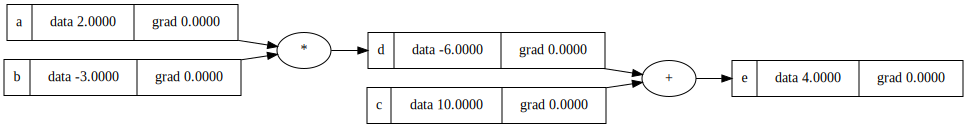

In [23]:
draw_dot(e)

## 4. O Coração da Diferenciação Automática: Backpropagation

In [24]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self._backward = lambda: None
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad}, label={self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad * 1.0
            other.grad += out.grad * 1.0
        out._backward = _backward

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        out._backward = _backward

        return out
    
    def backward(self):
        # 1. Construir o grafo na ordem topológica inversa
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        # 2. Inicializar o gradiente do nó de saída
        self.grad = 1.0

        # 3. Iterar e propagar os gradientes
        for node in reversed(topo):
            node._backward()

### 4.1. Como Funciona o `backward()`

-   Começamos com o gradiente do nó de saída (`out.grad = 1.0`).
-   Percorremos o grafo computacional na ordem **reversa** (topológica).
-   Para cada nó, chamamos seu método `_backward()`.
-   `_backward()` usa a Regra da Cadeia para distribuir o gradiente de `out` para seus pais (`self.grad += out.grad * local_gradient`).
-   **Acumulação:** É importante *somar* os gradientes (`+=`), pois um nó pode contribuir para o output final por múltiplos caminhos.

#### 4.1.1 A Regra da Cadeia no Forward e Backward

A **regra da cadeia** é um conceito fundamental do cálculo usado para derivar funções compostas.

Se $z = f(g(x))$, então:

$$
\frac{dz}{dx} = \frac{dz}{dg} \cdot \frac{dg}{dx}
$$

No contexto de redes neurais (funções escalares compostas de várias operações), isso permite que calculemos gradientes de forma eficiente percorrendo o grafo de trás para frente (**backpropagation**).


<!-- Seja:

$$
z = x + y
$$

As derivadas parciais são:

$$
\frac{\partial z}{\partial x} = 1, \quad
\frac{\partial z}{\partial y} = 1
$$

Aplicando a regra da cadeia:

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial x} = \frac{\partial L}{\partial z} \cdot 1
$$

$$
\frac{\partial L}{\partial y} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial y} = \frac{\partial L}{\partial z} \cdot 1
$$
 -->

#### 4.1.2 Regra da Cadeia para Adição

Se $z = x + y$, temos:

$$
\frac{\partial z}{\partial x} = 1, \quad \frac{\partial z}{\partial y} = 1
$$

No backward pass:

```python
def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
        self.grad += 1 * out.grad
        other.grad += 1 * out.grad
    out._backward = _backward

    return out


Como a derivada da soma é 1 em relação a cada entrada, basta propagar o gradiente do filho diretamente para os pais.

<!-- Para entender o backpropagation dentro da classe `Value`, precisamos aplicar a **Regra da Cadeia** explicitamente.

Seja uma função composta:

$$
h(x) = f(g(x))
$$

Pela regra da cadeia:

$$
\frac{dh}{dx} = \frac{df}{dg} \cdot \frac{dg}{dx}
$$

No grafo computacional, cada nó calcula:
1. Seu **valor (forward pass)**.
2. Sua **derivada local**.
3. Propaga o gradiente para os nós pais multiplicando pelo gradiente recebido.
 -->

#### 4.1.2 Regra da Cadeia para Multiplicação

Se $z = x \cdot y$, temos:

$$
\frac{\partial z}{\partial x} = y, \quad \frac{\partial z}{\partial y} = x
$$

No backward pass:

```python

def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
        self.grad += other.data * out.grad
        other.grad += self.data * out.grad
    out._backward = _backward

    return out


Aqui o gradiente do filho é multiplicado pelo valor do outro operando, conforme a regra da cadeia.

In [25]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = Value(-2.0, label='d')

e = a * b; e.label = 'e'
f = c + d; f.label = 'f'
L = e + f; L.label = 'L'

L.backward()

print(f"L.data = {L.data}")  # forward
print(f"a.grad = {a.grad}") # backward analítico: b = -3
print(f"b.grad = {b.grad}") # backward analítico: a = 2
print(f"c.grad = {c.grad}") # backward analítico: 1
print(f"d.grad = {d.grad}") # backward analítico: 1


L.data = 2.0
a.grad = -3.0
b.grad = 2.0
c.grad = 1.0
d.grad = 1.0


### 4.1.3 Ordenação Topológica (Topological Sort)

O backward precisa garantir que cada nó seja processado **somente depois** de todos os seus filhos.  
Isso é feito com uma **ordenação topológica** do grafo.

Exemplo:  

In [26]:
a = 2
b = 3
c = a * b # 6
d = c + b # 9
e = d + a # 11


Topological sort: `[a, b, c, d, e]`  
Para backpropagation percorremos na ordem inversa: `[e, d, c, b, a]`.


In [27]:
def backward(self):
    # 1. Construir o grafo na ordem topológica inversa
    topo = []
    visited = set()
    def build_topo(v):
        if v not in visited:
            visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
    build_topo(self)

    # 2. Inicializar o gradiente do nó de saída
    self.grad = 1.0

    # 3. Iterar e propagar os gradientes
    for node in reversed(topo):
        node._backward()

Resumo:

1. **Forward pass:** constrói o DAG dinâmico e computa os valores.  
2. **Backward pass:** usa topological sort e aplica a regra da cadeia em cada nó.  
3. Assim, gradientes são propagados de forma correta e acumulados nos nós pais.  

### 4.2. Exemplo Detalhado de Backpropagation

-   Vamos usar um exemplo simples para traçar os gradientes manualmente e comparar com o micrograd.
-   Exemplo: $L = (f*e), \text{com} f = d + c, e = a * b$, onde $a, b, c, d$ são inputs.

In [28]:
# Exemplo de backpropagation
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = Value(-2.0, label='d')

e = a * b; e.label = 'e'
f = c + d; f.label = 'f'
L = e + f; L.label = 'L'

L.backward()

print(f"L.data = {L.data}")
print(f"a.grad = {a.grad}")
print(f"b.grad = {b.grad}")
print(f"c.grad = {c.grad}")
print(f"d.grad = {d.grad}")

L.data = 2.0
a.grad = -3.0
b.grad = 2.0
c.grad = 1.0
d.grad = 1.0


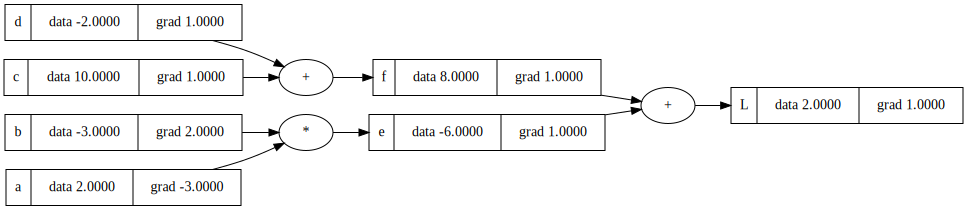

In [29]:
draw_dot(L)

Considere:

$$
L = (a \cdot b) + (c + d)
$$

**Forward:**

- $e = a \cdot b$
- $f = c + d$
- $L = e + f$

**Backward (gradiente de L):**

- $\frac{\partial L}{\partial e} = 1$, $\frac{\partial L}{\partial f} = 1$
- $\frac{\partial e}{\partial a} = b$, $\frac{\partial e}{\partial b} = a$
- $\frac{\partial f}{\partial c} = 1$, $\frac{\partial f}{\partial d} = 1$

**Propagando:**

- $\frac{\partial L}{\partial a} = \frac{\partial L}{\partial e} \cdot \frac{\partial e}{\partial a} = 1 \cdot b = b$
- $\frac{\partial L}{\partial b} = \frac{\partial L}{\partial e} \cdot \frac{\partial e}{\partial b} = 1 \cdot a = a$
- $\frac{\partial L}{\partial c} = 1 \cdot 1 = 1$
- $\frac{\partial L}{\partial d} = 1 \cdot 1 = 1$


### 4.3. Implementação completa da classe Value

In [30]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self._backward = lambda: None
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad}, label={self.label})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad * 1.0
            other.grad += out.grad * 1.0
        out._backward = _backward

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += out.grad * (1 - t**2)
        out._backward = _backward

        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out

    def relu(self):
        out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')

        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward

        return out

    def backward(self):

        # topological order all of the children in the graph
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        # go one variable at a time and apply the chain rule to get its gradient
        self.grad = 1
        for v in reversed(topo):
            v._backward()

    def __neg__(self): # -self
        return self * -1

    def __radd__(self, other): # other + self
        return self + other

    def __sub__(self, other): # self - other
        return self + (-other)

    def __rsub__(self, other): # other - self
        return other + (-self)

    def __rmul__(self, other): # other * self
        return self * other

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        return other * self**-1

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"    


In [31]:
# Exemplo de backpropagation
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = Value(-2.0, label='d')

e = a * b; e.label = 'e'
f = c + d; f.label = 'f'
G = e + f; G.label = 'G'
L = G.tanh(); L.label = 'L'

L.backward()

print(f"L.data = {L.data}")
print(f"a.grad = {a.grad}")
print(f"b.grad = {b.grad}")
print(f"c.grad = {c.grad}")
print(f"d.grad = {e.grad}")
print(f"d.grad = {f.grad}")
print(f"L.data = {G.grad}")


L.data = 0.9640275800758169
a.grad = -0.2119524745594933
b.grad = 0.14130164970632886
c.grad = 0.07065082485316443
d.grad = 0.07065082485316443
d.grad = 0.07065082485316443
L.data = 0.07065082485316443


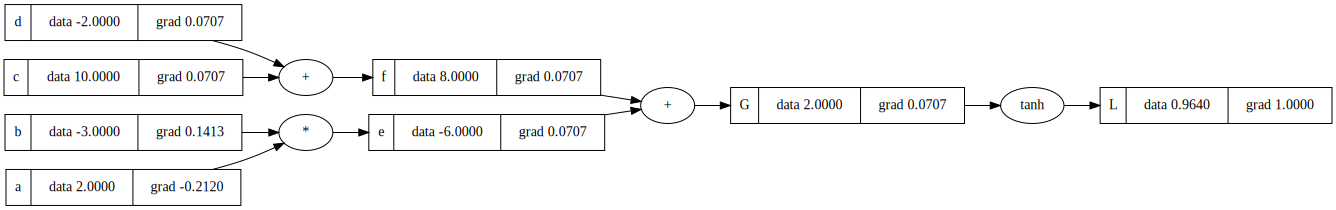

In [32]:
draw_dot(L)

## 5. De `Value` a Redes Neurais Simples

### 5.1. Construindo um Neurônio

-   Um neurônio é uma soma ponderada dos inputs, seguida por uma função de ativação.
-   Podemos usar nossos objetos `Value` para representar pesos, bias e inputs.

In [33]:
# Código para um neurônio simples
import random

class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        # w * x + b
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh() # ou outra função de ativação
        return out

    def parameters(self):
        return self.w + [self.b]

n = Neuron(3)
xs_neuron = [Value(2.0), Value(3.0), Value(-1.0)]
out_neuron = n(xs_neuron)
print(out_neuron)

Value(data=0.29310160201823876, grad=0.0)


### 5.2. Multi-Layer Perceptron (MLP)

In [34]:
# Código para uma camada ou MLP
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
            # Para o caso de múltiplas camadas, a saída de uma camada pode ser uma lista
            # e precisa ser tratada como os inputs da próxima, se for uma lista de Values
            # Isso é mais robusto:
            if not isinstance(x, list):
                x = [x]
        # Se a saída final for uma lista de 1 elemento, retorne o elemento, senão a lista
        return x[0] if len(x) == 1 else x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

mlp = MLP(3, [4, 4, 1]) # Ex: 3 inputs, 2 camadas ocultas de 4 neurônios, 1 output
xs_mlp = [Value(2.0), Value(3.0), Value(-1.0)]
out_mlp = mlp(xs_mlp)
print(out_mlp)

Value(data=-0.3143493577426289, grad=0.0)


### 5.3. Um Loop de Treinamento Simplificado

-   Podemos simular um ciclo de treinamento de uma rede neural.
-   Passo a passo:
    1.  Forward Pass (calcula o output da rede).
    2.  Calcula a Loss (erro).
    3.  Zera os gradientes dos parâmetros.
    4.  Backward Pass (`loss.backward()`).
    5.  Atualiza os parâmetros usando os gradientes (`p.data -= learning_rate * p.grad`).

In [35]:
# Exemplo de loop de treinamento com dados dummy
xs = [
  [Value(2.0), Value(3.0), Value(-1.0)],
  [Value(3.0), Value(-1.0), Value(0.5)],
  [Value(0.5), Value(1.0), Value(1.0)],
  [Value(1.0), Value(1.0), Value(-1.0)],
]
ys = [Value(1.0), Value(-1.0), Value(-1.0), Value(1.0)] # Desired outputs

learning_rate = 0.05

print("Treinando MLP...")
for k in range(100):
    # Forward pass
    ypred = [mlp(x) for x in xs]
    
    # Calcular a loss (MSE simples)
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

    # Zero gradientes
    for p in mlp.parameters():
        p.grad = 0.0

    # Backward pass
    loss.backward()

    # Update (descida do gradiente)
    for p in mlp.parameters():
        p.data -= learning_rate * p.grad

    if k % 10 == 0:
        print(f"Epoch {k}: Loss = {loss.data:.4f}")

print("\n--- Treinamento Concluído ---")
print("Final Predictions:")
for i, x_input in enumerate(xs):
    # Recalcular ypred após o treinamento para mostrar os resultados finais
    final_ypred = mlp(x_input) 
    print(f"Input: {[v.data for v in x_input]} -> Predicted: {final_ypred.data:.4f} (Actual: {ys[i].data})")

Treinando MLP...
Epoch 0: Loss = 9.4584
Epoch 10: Loss = 0.3313
Epoch 20: Loss = 0.0607
Epoch 30: Loss = 0.0315
Epoch 40: Loss = 0.0209
Epoch 50: Loss = 0.0155
Epoch 60: Loss = 0.0123
Epoch 70: Loss = 0.0101
Epoch 80: Loss = 0.0086
Epoch 90: Loss = 0.0075

--- Treinamento Concluído ---
Final Predictions:
Input: [2.0, 3.0, -1.0] -> Predicted: 0.9625 (Actual: 1.0)
Input: [3.0, -1.0, 0.5] -> Predicted: -0.9776 (Actual: -1.0)
Input: [0.5, 1.0, 1.0] -> Predicted: -0.9473 (Actual: -1.0)
Input: [1.0, 1.0, -1.0] -> Predicted: 0.9562 (Actual: 1.0)


## 6. Conclusão e Takeaways

### O que aprendemos?

-   A diferenciação automática (especialmente o modo reverso/backpropagation) é a espinha dorsal do ML moderno.
-   O micrograd nos permite entender como os gradientes são calculados de forma precisa e eficiente através de um grafo computacional.
-   Essa compreensão nos torna cientistas de dados mais eficazes, permitindo depurar, otimizar e até mesmo inovar em arquiteturas de modelos.

## 7. Referências / Recursos adicionais

### Recursos Adicionais

-   **Vídeo do Andrej Karpathy:** "The spelled-out intro to neural networks and backpropagation" ([Link do YouTube](https://www.youtube.com/watch?v=VMj-3S1tku0))
-   **Repositório micrograd no GitHub:** ([Link do GitHub](https://github.com/karpathy/micrograd))
-   **Repositório nn-zero-to-hero no GitHub:** ([Link do GitHub](https://github.com/karpathy/nn-zero-to-hero)
---

**Perguntas?**

#### Links adicionais
- https://karpathy.ai/
- https://www.queryloop.ai/blog/explanation-of-karpathy-s-micrograd
- https://github.com/EurekaLabsAI/micrograd/blob/master/micrograd.py
- https://chautuankien.medium.com/micrograd-unlocking-the-core-of-ai-aeef6a8d43ae